In [1]:
# Import libraries
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Configure plot size globally for consistency
plt.rcParams["figure.figsize"] = (12, 5)

### Generating Monthly Time Series Data

In [2]:
my_dates = pd.date_range(start='2024-01-01', periods=100, freq='D')
oil_temperatures = np.random.uniform(size=len(my_dates), low=2, high=25)
weather_temperatures = np.random.uniform(size=len(my_dates), low=20, high=45)

In [3]:
oil_temperatures_series = pd.Series(oil_temperatures, index=my_dates)
weather_temperatures_series = pd.Series(weather_temperatures, index=my_dates)

### Plotting the Monthly Time Series Data

Text(0.5, 1.0, 'My series')

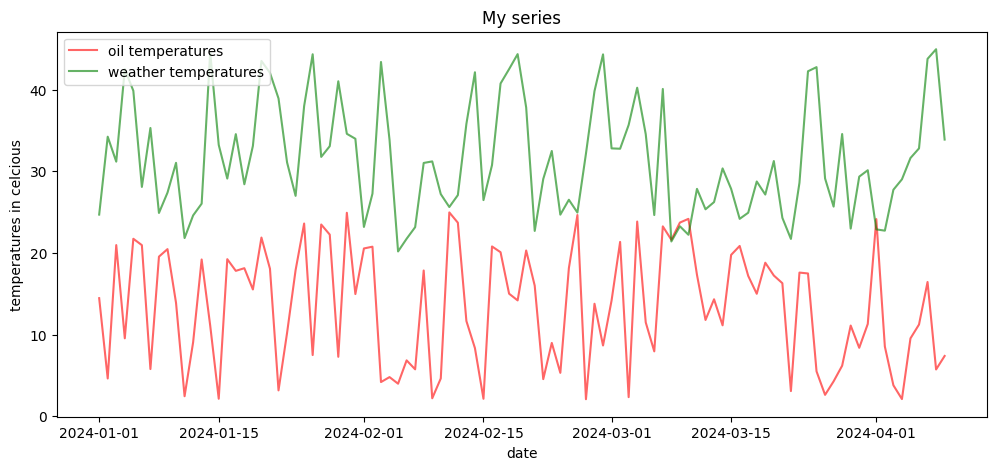

In [10]:
plt.plot(oil_temperatures_series, color='red', alpha=0.6, label='oil temperatures')
plt.plot(weather_temperatures_series,  color='green', alpha=0.6, label='weather temperatures')
plt.legend()
plt.xlabel('date')
plt.ylabel('temperatures in celcious')
plt.title('My series')

### Combining Series into a DataFrame

In [14]:
pd.concat([oil_temperatures_series, weather_temperatures_series], axis=1).rename(columns={0:'oil', 1:'weather'})

,oil,weather
2024-01-01,14.452263,24.688580
2024-01-02,4.612917,34.232405
2024-01-03,20.953770,31.175295
2024-01-04,9.533892,42.518675
2024-01-05,21.727438,39.854734
...,...,...
2024-04-05,9.528134,31.620447
2024-04-06,11.224216,32.798013
2024-04-07,16.433712,43.767195
2024-04-08,5.718939,44.946664


In [20]:
oil_temperatures_series.name = "oil_temperatures"
weather_temperatures_series.name = 'weather_temperatures'

combined_df = pd.merge(oil_temperatures_series, weather_temperatures_series, left_index=True, right_index=True)

### Selecting Time Series Data by Date

In [24]:
combined_df['2024-01-05':'2024-01-10']

,oil_temperatures,weather_temperatures
2024-01-05,21.727438,39.854734
2024-01-06,20.946900,28.080000
2024-01-07,5.770011,35.297861
2024-01-08,19.540830,24.889842
2024-01-09,20.459545,27.378466
2024-01-10,13.873576,31.031935


In [32]:
combined_df['weather_temperatures'].iloc[-5:]

2024-04-05    31.620447
2024-04-06    32.798013
2024-04-07    43.767195
2024-04-08    44.946664
2024-04-09    33.878064
Freq: D, Name: weather_temperatures, dtype: float64

In [27]:
combined_df.iloc[-5:]

,oil_temperatures,weather_temperatures
2024-04-05,9.528134,31.620447
2024-04-06,11.224216,32.798013
2024-04-07,16.433712,43.767195
2024-04-08,5.718939,44.946664
2024-04-09,7.372605,33.878064


In [29]:
combined_df.head()

,oil_temperatures,weather_temperatures
2024-01-01,14.452263,24.688580
2024-01-02,4.612917,34.232405
2024-01-03,20.953770,31.175295
2024-01-04,9.533892,42.518675
2024-01-05,21.727438,39.854734


In [28]:
combined_df.tail()

,oil_temperatures,weather_temperatures
2024-04-05,9.528134,31.620447
2024-04-06,11.224216,32.798013
2024-04-07,16.433712,43.767195
2024-04-08,5.718939,44.946664
2024-04-09,7.372605,33.878064


### Generating Daily Time Series Data with Rolling Mean

In [33]:
# Calculate the correlation between the original series and a 1-day lagged version

oil_temperatures_series

2024-01-01    14.452263
2024-01-02     4.612917
2024-01-03    20.953770
2024-01-04     9.533892
2024-01-05    21.727438
                ...    
2024-04-05     9.528134
2024-04-06    11.224216
2024-04-07    16.433712
2024-04-08     5.718939
2024-04-09     7.372605
Freq: D, Name: oil_temperatures, Length: 100, dtype: float64

In [36]:
oil_temperatures_series.diff(1)

2024-01-01          NaN
2024-01-02    -9.839346
2024-01-03    16.340853
2024-01-04   -11.419878
2024-01-05    12.193546
                ...    
2024-04-05     7.435391
2024-04-06     1.696082
2024-04-07     5.209496
2024-04-08   -10.714773
2024-04-09     1.653666
Freq: D, Name: oil_temperatures, Length: 100, dtype: float64

In [38]:
oil_temperatures_series

2024-01-01    14.452263
2024-01-02     4.612917
2024-01-03    20.953770
2024-01-04     9.533892
2024-01-05    21.727438
                ...    
2024-04-05     9.528134
2024-04-06    11.224216
2024-04-07    16.433712
2024-04-08     5.718939
2024-04-09     7.372605
Freq: D, Name: oil_temperatures, Length: 100, dtype: float64

In [41]:
oil_temperatures_series_shifted = oil_temperatures_series.shift(1)
oil_temperatures_series_shifted.name = "oil_temperatures_shifted"

In [42]:
pd.concat([oil_temperatures_series, oil_temperatures_series_shifted], axis=1)

,oil_temperatures,oil_temperatures_shifted
2024-01-01,14.452263,NaN
2024-01-02,4.612917,14.452263
2024-01-03,20.953770,4.612917
2024-01-04,9.533892,20.953770
2024-01-05,21.727438,9.533892
...,...,...
2024-04-05,9.528134,2.092743
2024-04-06,11.224216,9.528134
2024-04-07,16.433712,11.224216
2024-04-08,5.718939,16.433712


In [39]:
oil_temperatures_series.corr(oil_temperatures_series.shift(1))

0.11999586893084438

In [34]:
oil_temperatures_series.diff(1)

2024-01-01          NaN
2024-01-02    -9.839346
2024-01-03    16.340853
2024-01-04   -11.419878
2024-01-05    12.193546
                ...    
2024-04-05     7.435391
2024-04-06     1.696082
2024-04-07     5.209496
2024-04-08   -10.714773
2024-04-09     1.653666
Freq: D, Name: oil_temperatures, Length: 100, dtype: float64

In [48]:
oil_temperatures_series.iloc[:3].mean()

13.339649769170938

In [49]:
oil_temperatures_series.iloc[1:4].mean()

11.700192751062191

In [46]:
oil_temperatures_series.rolling(3).mean()

2024-01-01          NaN
2024-01-02          NaN
2024-01-03    13.339650
2024-01-04    11.700193
2024-01-05    17.405033
                ...    
2024-04-05     5.134378
2024-04-06     7.615031
2024-04-07    12.395354
2024-04-08    11.125622
2024-04-09     9.841752
Freq: D, Name: oil_temperatures, Length: 100, dtype: float64

Text(0.5, 1.0, 'My series')

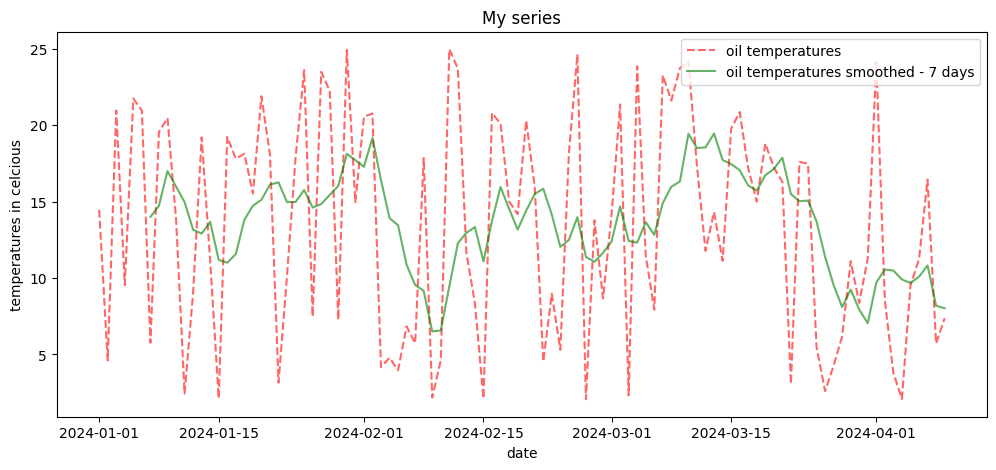

In [57]:
plt.plot(oil_temperatures_series, color='red', alpha=0.6, label='oil temperatures', linestyle='--')
plt.plot(oil_temperatures_series.rolling(7).mean(),  color='green', alpha=0.6, label='oil temperatures smoothed - 7 days')
plt.legend()
plt.xlabel('date')
plt.ylabel('temperatures in celcious')
plt.title('My series')

In [60]:
oil_temperatures_series

2024-01-01    14.452263
2024-01-02     4.612917
2024-01-03    20.953770
2024-01-04     9.533892
2024-01-05    21.727438
                ...    
2024-04-05     9.528134
2024-04-06    11.224216
2024-04-07    16.433712
2024-04-08     5.718939
2024-04-09     7.372605
Freq: D, Name: oil_temperatures, Length: 100, dtype: float64

In [61]:
oil_temperatures_series.shape

(100,)

In [62]:
oil_temperatures_series.resample('W').mean().shape

(15,)

Text(0.5, 1.0, 'My series')

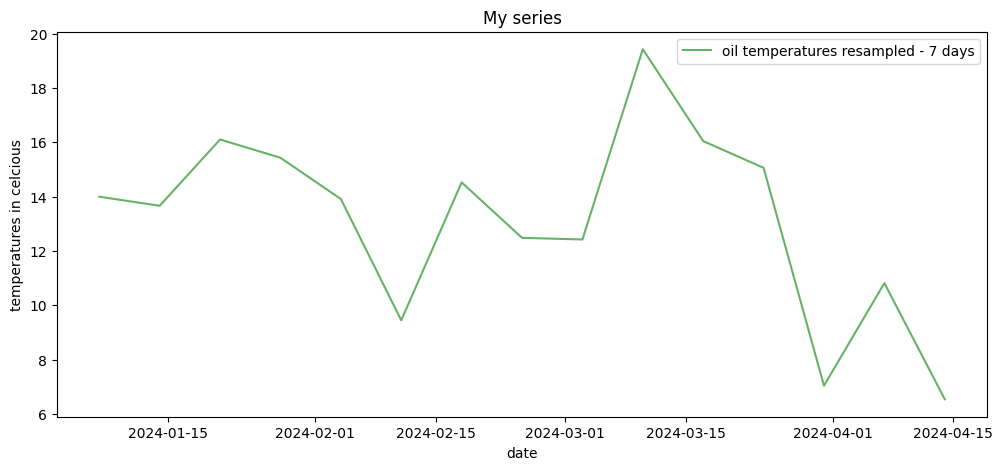

In [65]:
# plt.plot(oil_temperatures_series, color='red', alpha=0.6, label='oil temperatures', linestyle='--')
plt.plot(oil_temperatures_series.resample('W').mean(),  color='green', alpha=0.6, label='oil temperatures resampled - 7 days')
plt.legend()
plt.xlabel('date')
plt.ylabel('temperatures in celcious')
plt.title('My series')

In [90]:
oil_temperatures_series[:7]

2024-01-01    14.452263
2024-01-02     4.612917
2024-01-03    20.953770
2024-01-04     9.533892
2024-01-05    21.727438
2024-01-06          NaN
2024-01-07     5.770011
Freq: D, Name: oil_temperatures, dtype: float64

In [91]:
oil_temperatures_series[8:15]

2024-01-09    20.459545
2024-01-10    13.873576
2024-01-11          NaN
2024-01-12     9.043255
2024-01-13    19.191947
2024-01-14    11.102787
2024-01-15     2.130169
Freq: D, Name: oil_temperatures, dtype: float64

In [88]:
oil_temperatures_series.resample('W').median()

2024-01-07    11.993077
2024-01-14    16.532762
2024-01-21    17.961224
2024-01-28    22.236910
2024-02-04    14.956673
2024-02-11     5.735196
2024-02-18    15.000102
2024-02-25    14.179246
2024-03-03    11.211712
2024-03-10          NaN
2024-03-17    19.014623
2024-03-24    17.226049
2024-03-31     6.181020
2024-04-07     9.528134
2024-04-14     6.545772
Freq: W-SUN, Name: oil_temperatures, dtype: float64

### Introducing Missing Data and Checking NaNs

In [73]:
oil_temperatures_series.iloc[5] = np.nan

oil_temperatures_series.iloc[10] = np.nan

oil_temperatures_series.iloc[20:25] = np.nan

oil_temperatures_series.iloc[60:75] = np.nan

Text(0.5, 1.0, 'My series')

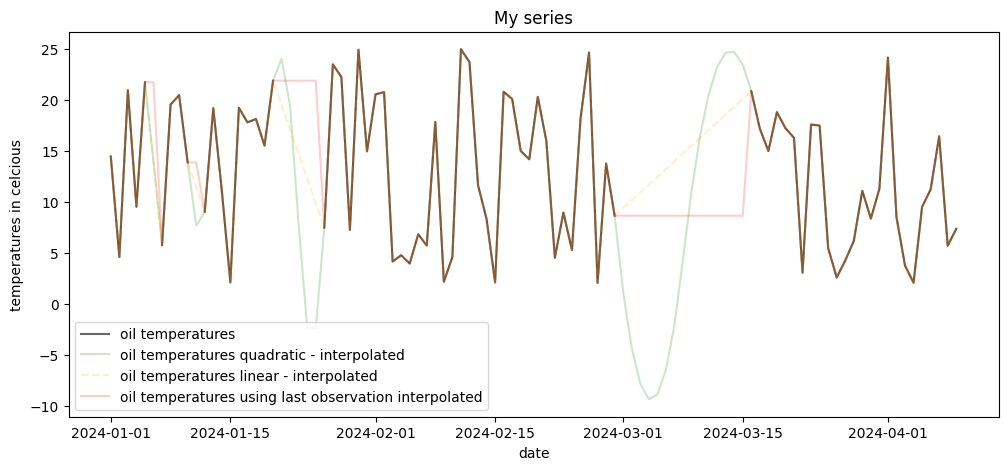

In [86]:
plt.plot(oil_temperatures_series, color='black', alpha=0.6, label='oil temperatures')
plt.plot(oil_temperatures_series.interpolate(method='quadratic'), color='green', alpha=0.2, label='oil temperatures quadratic - interpolated')
plt.plot(oil_temperatures_series.interpolate(method='linear'), color='orange', alpha=0.2, label='oil temperatures linear - interpolated', linestyle='--')
plt.plot(oil_temperatures_series.ffill(), color='red', alpha=0.2, label='oil temperatures using last observation interpolated')
plt.legend()
plt.xlabel('date')
plt.ylabel('temperatures in celcious')
plt.title('My series')

In [ ]:
# Introduce missing values at specific indices

### Setting Up a Time Series with Trend, Seasonality, and Noise

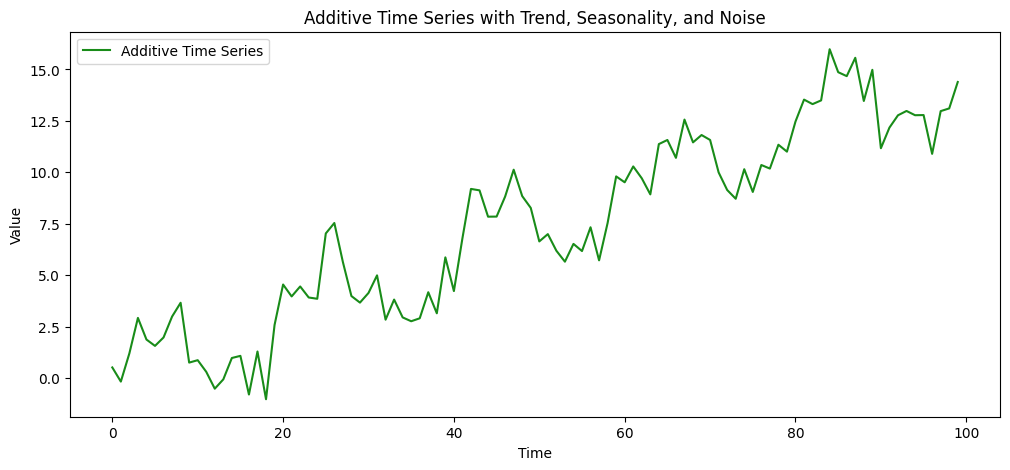

In [92]:
# Generate a time series with trend, seasonality, and noise
periods = 100
time = np.arange(periods)

# Define a linear trend
trend = 0.15 * time

# Generate seasonality with a periodicity of 20 (e.g., monthly pattern)
seasonality_period = 20
seasonality = 2 * np.sin(2 * np.pi * time / seasonality_period)

# Generate random noise
noise = np.random.normal(size=len(time))

# Additive time series (trend + seasonality + noise)
our_timeseries_add = trend + seasonality + noise

# Multiplicative time series (trend * seasonality * noise)
our_timeseries_multiplicative = trend * seasonality * noise

# Plot the additive time series
plt.figure(figsize=(12, 5))
plt.plot(our_timeseries_add, color='green', alpha=0.9, label='Additive Time Series')
plt.legend()
plt.title('Additive Time Series with Trend, Seasonality, and Noise')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


### Decomposing the Time Series

<Figure size 1200x800 with 0 Axes>

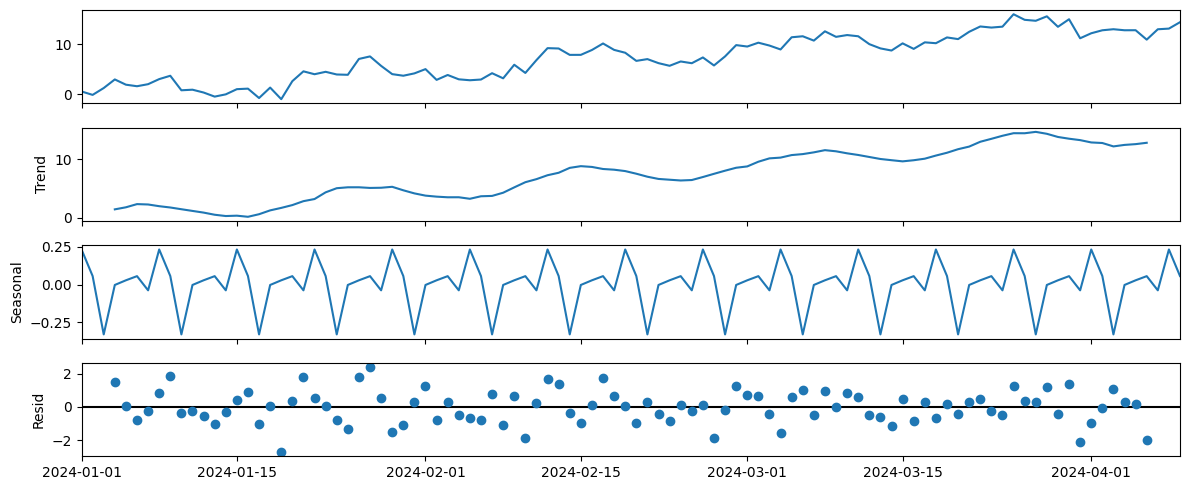

In [93]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert the time series into a pandas Series
time_series = pd.Series(our_timeseries_add, index=pd.date_range(start='2024-01-01', periods=100, freq='D'))

# Decompose the time series
decomposition = seasonal_decompose(time_series, model='additive')

# Plot the decomposition
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.tight_layout()
plt.show()


### Moving Averages and Smoothing Techniques

Simple Moving Average (SMA): Smooths out short-term fluctuations by averaging over a fixed window.  
Weighted Moving Average (WMA): Assigns higher weights to more recent observations, emphasizing recent trends.   
Exponential Smoothing: Applies a decaying weight to past observations based on a smoothing factor, capturing trends more responsively.

In [98]:
np.random.seed(0)  # For reproducibility
time_series = pd.Series(np.cumsum(np.random.randn(100)) + 20, 
                        index=pd.date_range(start='2024-01-01', periods=100, freq='D'))

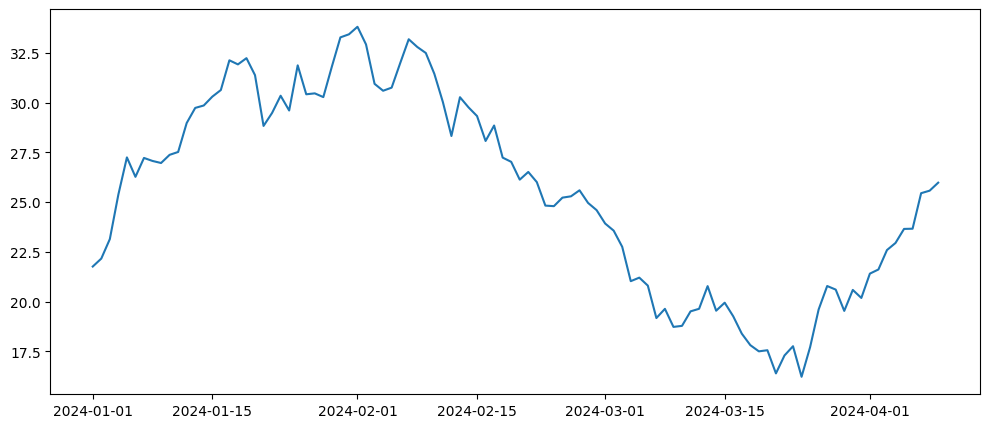

In [99]:
plt.plot(time_series)

In [113]:
period_size = 10

simple_smoothing_moving_average = time_series.rolling(period_size).mean()

#weighted moving average
weights = np.arange(1, period_size+1)
weighted_moving_average_values = time_series.rolling(period_size).apply(lambda x: np.sum(x*weights) / np.sum(weights))

In [116]:
weights

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

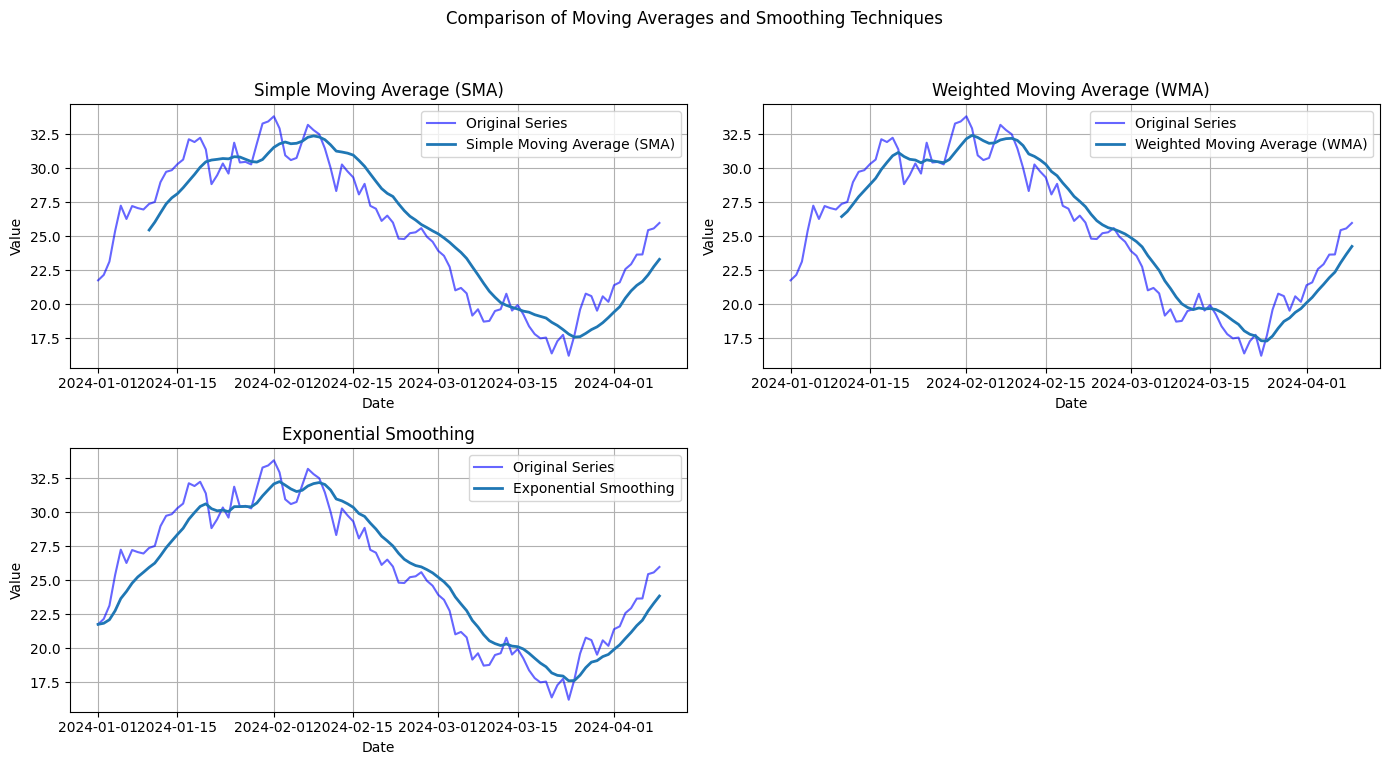

In [114]:


# 3. Exponential Smoothing (EWMA)
exponential_smoothing = time_series.ewm(alpha=0.2, adjust=False).mean()

# Prepare smoothing results for easier iteration and plotting
smoothing_methods = {
    'Simple Moving Average (SMA)': simple_smoothing_moving_average,
    'Weighted Moving Average (WMA)': weighted_moving_average_values,
    'Exponential Smoothing': exponential_smoothing
}

# Plotting each smoothing technique
plt.figure(figsize=(14, 8))
for i, (title, smoothed_data) in enumerate(smoothing_methods.items(), start=1):
    plt.subplot(2, 2, i)
    plt.plot(time_series, label='Original Series', color='blue', alpha=0.6)
    plt.plot(smoothed_data, label=title, linewidth=2)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()

# Adjust layout
plt.suptitle('Comparison of Moving Averages and Smoothing Techniques')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Time Series Forecasting with Multiple Methods

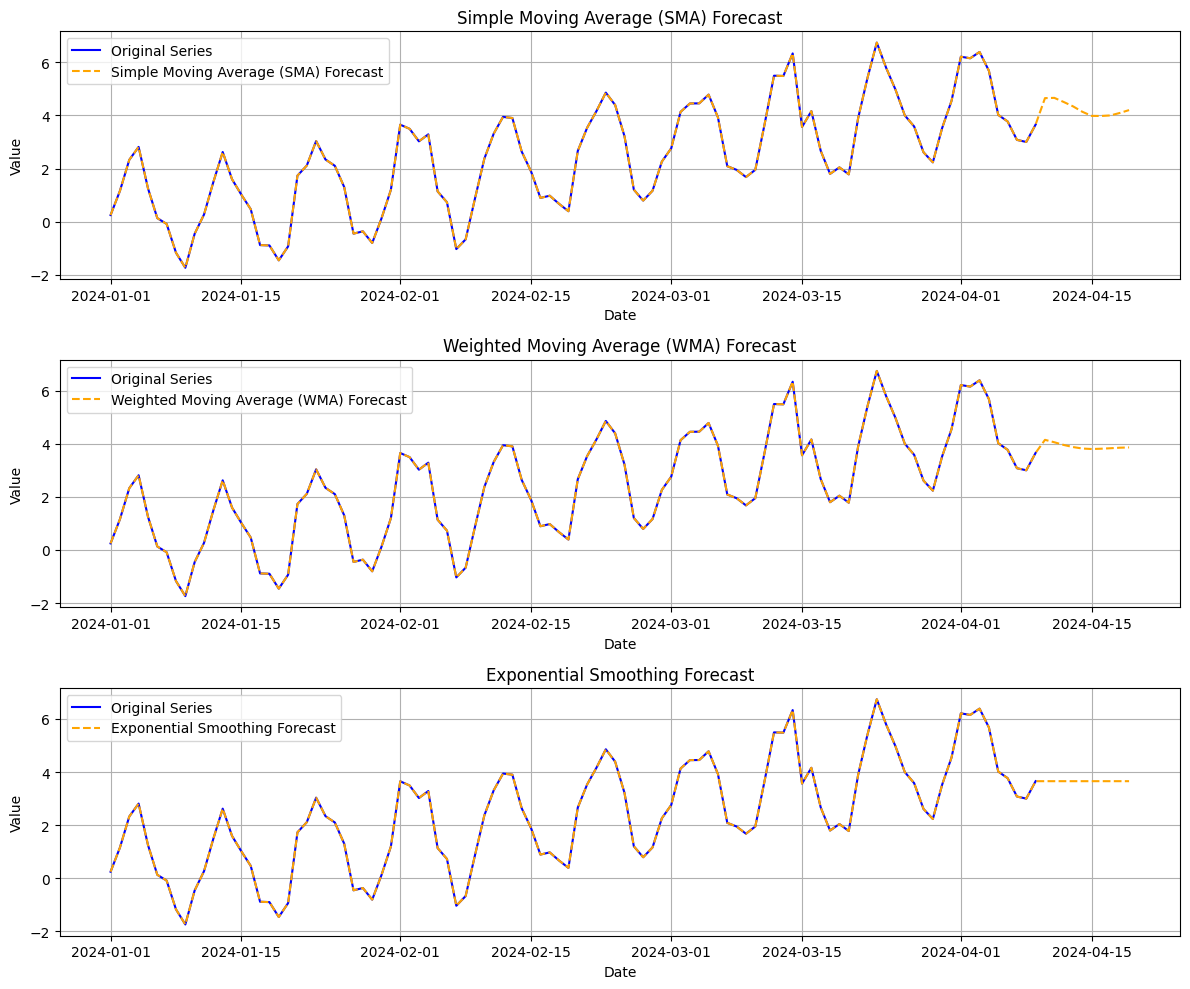

In [117]:
# Set random seed and generate synthetic time series
np.random.seed(42)
n_periods = 100
time = np.arange(n_periods)
trend = 0.05 * time
seasonality = 2 * np.sin(2 * np.pi * time / 10)
white_noise = np.random.normal(loc=0, scale=0.5, size=n_periods)
time_series = trend + seasonality + white_noise

# Create DataFrame
df = pd.DataFrame({'Value': time_series}, index=pd.date_range(start='2024-01-01', periods=n_periods))

# Forecast Parameters
window_size = 10
forecast_steps = 10
alpha = 0.2  # Smoothing factor for Exponential Smoothing
weights = np.arange(1, window_size + 1)  # For WMA

# Initialize DataFrames for forecasting methods
forecast_methods = {
    'SMA Forecast': df.copy(),
    'WMA Forecast': df.copy(),
    'Exponential Smoothing Forecast': df.copy()
}

# Forecasting Logic for each method
for i in range(forecast_steps):
    # Simple Moving Average (SMA)
    sma_last_window = forecast_methods['SMA Forecast']['Value'][-window_size:]
    sma_new_value = sma_last_window.mean()
    forecast_methods['SMA Forecast'].loc[forecast_methods['SMA Forecast'].index[-1] + pd.Timedelta(days=1)] = sma_new_value

    # Weighted Moving Average (WMA)
    wma_last_window = forecast_methods['WMA Forecast']['Value'][-window_size:]
    wma_new_value = np.sum(weights * wma_last_window) / np.sum(weights)
    forecast_methods['WMA Forecast'].loc[forecast_methods['WMA Forecast'].index[-1] + pd.Timedelta(days=1)] = wma_new_value

    # Exponential Smoothing
    exp_last_value = forecast_methods['Exponential Smoothing Forecast']['Value'].iloc[-1]
    exp_new_value = alpha * exp_last_value + (1 - alpha) * exp_last_value
    forecast_methods['Exponential Smoothing Forecast'].loc[forecast_methods['Exponential Smoothing Forecast'].index[-1] + pd.Timedelta(days=1)] = exp_new_value

# Plotting the results in a loop
plt.figure(figsize=(12, 10))
titles = [
    'Simple Moving Average (SMA) Forecast',
    'Weighted Moving Average (WMA) Forecast',
    'Exponential Smoothing Forecast'
]

for i, (method, forecast_df) in enumerate(forecast_methods.items(), start=1):
    plt.subplot(3, 1, i)
    plt.plot(df['Value'], label='Original Series', color='blue')
    plt.plot(forecast_df['Value'], label=titles[i-1], color='orange', linestyle='--')
    plt.title(titles[i-1])
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

### ARMA forecasting

/Users/pantost/Desktop/codehub/timeseries/codehub/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


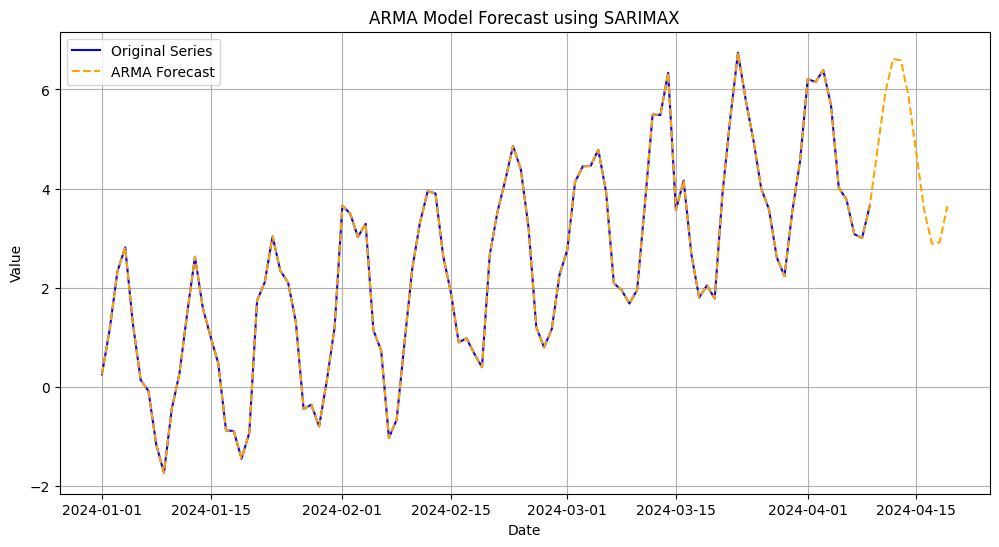

In [118]:
import statsmodels.api as sm

arma_forecast = df.copy()

# 4. ARMA Model Forecasting using SARIMAX
# Fit the SARIMAX model (order: p=2, d=0, q=2)
p = 3
d = 0  # No differencing for ARMA
q = 4
# Define and fit the ARMA model
model = sm.tsa.SARIMAX(df['Value'], order=(p, d, q))
arma_fit = model.fit(maxiter=500, disp=False)

# Forecast steps into the future
arma_forecast_values = arma_fit.forecast(steps=forecast_steps)

# Append forecasts to arma_forecast DataFrame
for i, forecast_value in enumerate(arma_forecast_values):
    next_date = arma_forecast.index[-1] + pd.Timedelta(days=1)
    arma_forecast.loc[next_date] = forecast_value



# 4. Original Series and ARMA Forecast
plt.figure(figsize=(12,6))
plt.plot(df['Value'], label='Original Series', color='blue')
plt.plot(arma_forecast, label='ARMA Forecast', color='orange', linestyle='--')
plt.title('ARMA Model Forecast using SARIMAX')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()